In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso


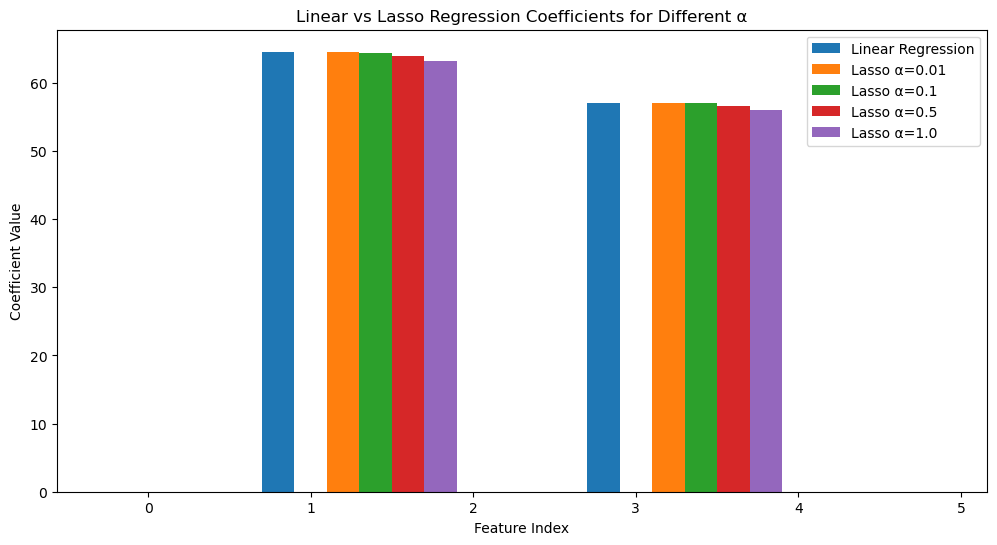

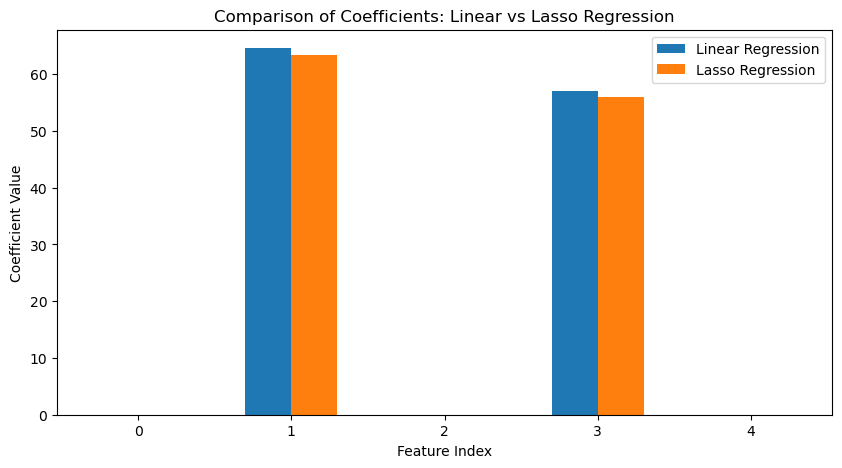

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

import matplotlib.pyplot as plt

# Example synthetic data
X = np.random.randn(100, 5)
y = 3*X[:, 0] + 0.5*X[:, 1] + np.random.randn(100) * 0.1  # Only first two features are relevant

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_coef = lr.coef_

# Lasso Regression
lasso = Lasso(alpha=0.1)
# Generate regression dataset with informative and redundant features
X, y, coef = make_regression(
    n_samples=100, n_features=5, n_informative=2, noise=0.1, coef=True, random_state=42
)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# List of alpha values for Lasso
alphas = [0.01, 0.1, 0.5, 1.0]

# Fit Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_coef = lr.coef_

# Fit Lasso for each alpha and store coefficients
lasso_coefs = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_coefs.append(lasso.coef_)

# Plot coefficients
plt.figure(figsize=(12, 6))
plt.bar(np.arange(X.shape[1]) - 0.2, lr_coef, width=0.2, label='Linear Regression')
for i, (alpha, coef_) in enumerate(zip(alphas, lasso_coefs)):
    plt.bar(np.arange(X.shape[1]) + 0.2 + i*0.2, coef_, width=0.2, label=f'Lasso α={alpha}')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Linear vs Lasso Regression Coefficients for Different α')
plt.legend()
plt.show()
lasso_coef = lasso.coef_

# Plot coefficients
plt.figure(figsize=(10, 5))
plt.bar(np.arange(X.shape[1]) - 0.15, lr_coef, width=0.3, label='Linear Regression')
plt.bar(np.arange(X.shape[1]) + 0.15, lasso_coef, width=0.3, label='Lasso Regression')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Coefficients: Linear vs Lasso Regression')
plt.legend()
plt.show()